## 데이터 불균형

데이터 불균형이란 데이터 세트 내의 클래스의 분포가 불균형한 것을 의미한다. 데이터 불균형은 특정 클래스에 과적합 되는 현상을 유발할 수 있기 때문에 반드시 해결해야 하는 문제다.

### 1. Weighted Random Sampling

In [ ]:
# 각 클래스의 비율을 정하여 뽑힐 확률에 대한 가중치를 산정한다.
import torch
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import torchvision.transforms as tr

def make_weights_for_balanced_classes(img,nclasses):
	labels = []
	for i in range(len(img)):
		labels.append(img[i][1])
	label_array = np.array(labels)
	total = len(labels)

	count_list = []
	for cls in range(nclasses):
		count = len(np.where(label_array == cls)[0]) #클래스 개수 세기
		count_list.append(total/count)

	weights = []
	for label in label_array:
		weights.append(count_list[label])

	return weights

In [ ]:
%cd /content/drive/MyDrive/Pytorch/Pytorch_study

/content/drive/MyDrive/Pytorch/Pytorch_study


In [ ]:
transf = tr.Compose([tr.Resize((128,128)),tr.ToTensor()]) #128x128 이미지 크기 변환 후 텐서로 만든다.
trainset = torchvision.datasets.ImageFolder(root='./class', transform = transf)

weights = make_weights_for_balanced_classes(trainset.imgs, len(trainset.classes)) #가중치 계산
weights = torch.DoubleTensor(weights) #텐서 변환
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights)) #샘플링 방법 정의

trianloader = DataLoader(trainset, batch_size=16, sampler=sampler)

### 2. Weighted Loss Function

In [ ]:
import torch.nn as nn
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_ins = [40,45,30,62,70,153,395,46,75,194] #클래스별 데이터 개수
weights = [1-(x/sum(num_ins)) for x in num_ins]
class_weights = torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight = class_weights)

### 3. Data Augmentation

In [ ]:
import torchvision.transforms as tr
import PIL

transf = tr.Compose([
    tr.ToPILImage(), tr.RandomCrop(60), tr.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.2,hue=0.2),
    tr.RandomHorizontalFlip(),
    tr.RandomRotation(10),
    tr.ToTensor()
])

### 4. Confusion Matrix

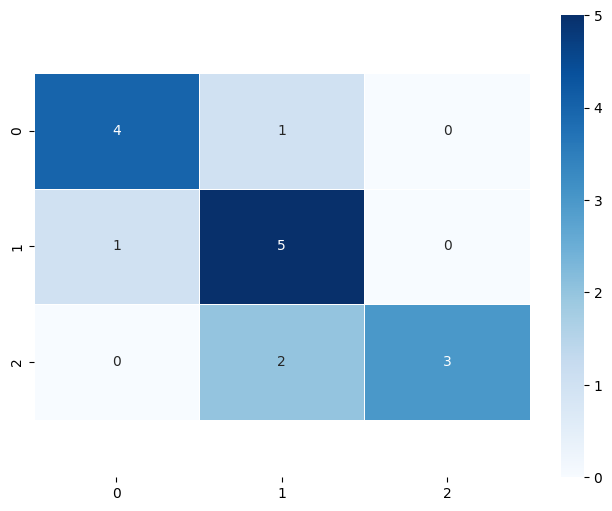

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

actual =     [1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,2]
prediction = [1,1,1,0,1,1,0,0,0,1,0,2,2,2,1,1]
c_mat = confusion_matrix(actual,prediction) #실제 라벨, 예측값
plt.figure(figsize=(8,6))
sns.heatmap(c_mat, annot=True,fmt="d",cmap='Blues',linewidths=.5)
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.savefig('confusion_matrix.png')
plt.show()